# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [15]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [25]:
# Extract all rows of data
table = soup.find('table')
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

# Extract table rows
rows = []
for tr in table.find_all('tr')[1:]:  # Skip the header row
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]
    rows.append(row)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
# Loop through the scraped data to create a list of rows
rows = []
for tr in table.find_all('tr')[1:]: 
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]
    rows.append(row)



In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=headers)

In [54]:
# Confirm DataFrame was created successfully
display(df)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133.0,5,-78.0,730.0
1863,1892,2018-02-24,1974,134.0,5,-77.0,729.0
1864,1894,2018-02-25,1975,134.0,5,-76.0,729.0
1865,1893,2018-02-26,1976,135.0,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [65]:
# Examine data type of each column
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows, columns=column_names)

# Examine the data types of each column before conversion
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [59]:
# Change data types for data analysis
print(df.head())

   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
3  35       2012-08-19   13  157.0      6     -74.0     732.0
4  46       2012-08-20   14  157.0      6     -74.0     740.0


In [61]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [69]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"{num_months}")

12


In [71]:
# 2. How many Martian days' worth of data are there?

num_sols = df['sol'].nunique()
print(f"{num_sols}")


1867


In [77]:
# 3. What is the average low temperature by month?
# Convert 'min_temp' column to float if not already done
df['min_temp'] = df['min_temp'].astype(float)

# Group by 'month' and calculate average minimum temperature
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Print average minimum temperature for each month
print(avg_min_temp)


month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


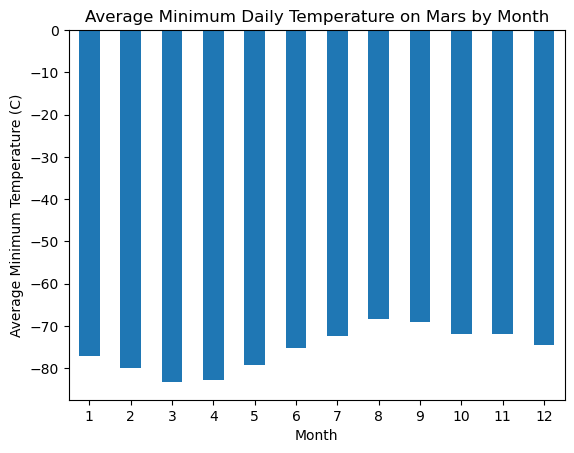

In [113]:
# Plot the average temperature by month
df['min_temp'] = df['min_temp'].astype(float)

# Group by 'month' and calculate average minimum temperature
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
avg_min_temp.plot(kind='bar', xlabel='Month', ylabel='Average Minimum Temperature (C)',
                  title='Average Minimum Daily Temperature on Mars by Month')
plt.xticks(rotation=0)
plt.show()

Coldest month: 3
Hottest month: 8


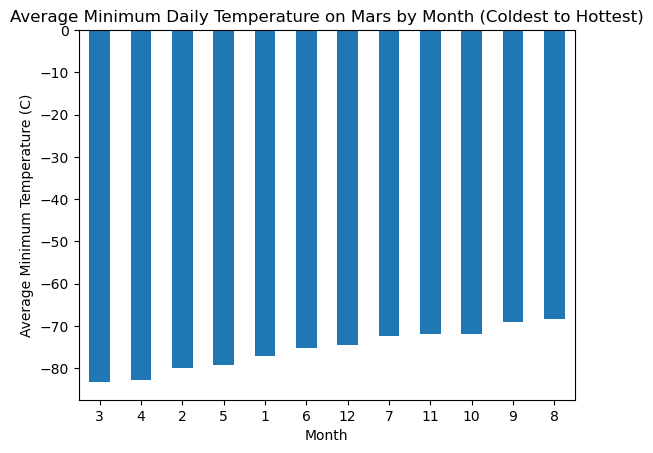

In [117]:
# Identify the coldest and hottest months in Curiosity's location
df = pd.DataFrame(rows, columns=column_names)

# Convert data types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Group by 'month' and calculate average minimum temperature
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Sort the months from coldest to hottest
sorted_avg_min_temp = avg_min_temp.sort_values()

# Find the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()

# Print the results
print(f"Coldest month: {coldest_month}")
print(f"Hottest month: {hottest_month}")

# Plot the average minimum temperature by month sorted from coldest to hottest
sorted_avg_min_temp.plot(kind='bar', xlabel='Month', ylabel='Average Minimum Temperature (C)',
                         title='Average Minimum Daily Temperature on Mars by Month (Coldest to Hottest)')
plt.xticks(rotation=0)
plt.show()

In [119]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()

# Print average atmospheric pressure for each month
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


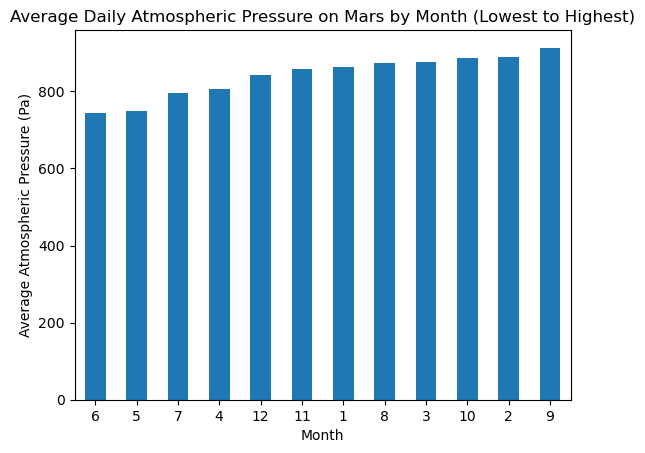

In [127]:
# Plot the average pressure by month
df = pd.DataFrame(rows, columns=column_names)

# Convert data types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Group by 'month' and calculate average atmospheric pressure
avg_pressure = df.groupby('month')['pressure'].mean()

# Sort the average pressures from lowest to highest
sorted_avg_pressure = avg_pressure.sort_values()

# Plot the average atmospheric pressure sorted from lowest to highest
sorted_avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure (Pa)',
                         title='Average Daily Atmospheric Pressure on Mars by Month (Lowest to Highest)')
plt.xticks(rotation=0)
plt.show()

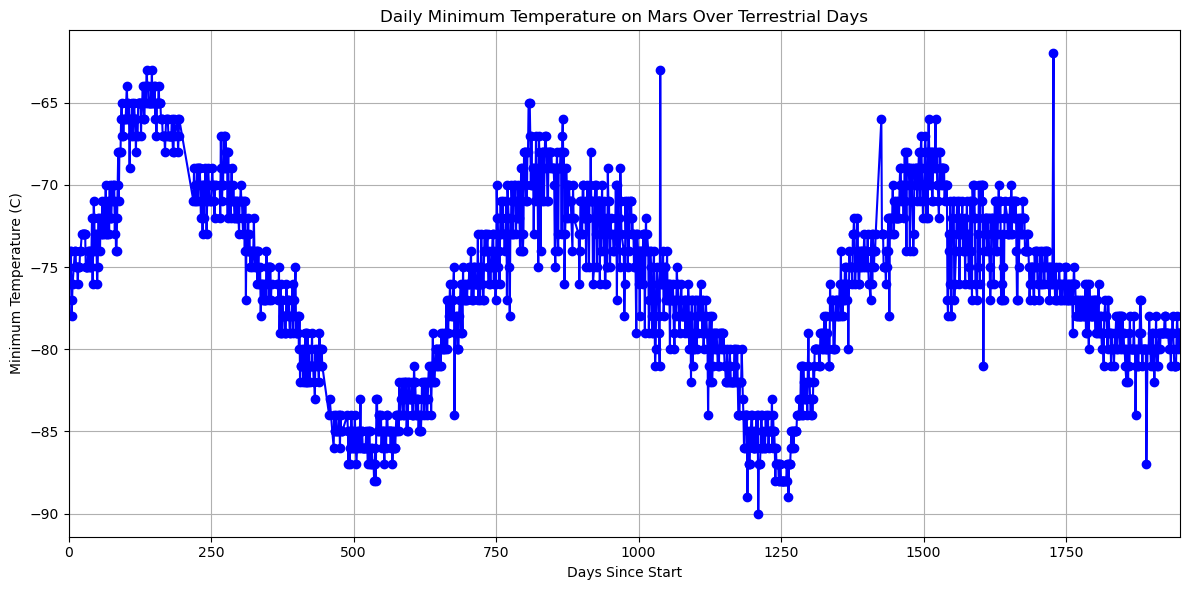

In [139]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df = pd.DataFrame(rows, columns=column_names)

# Convert data types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Calculate the number of days since the start of the dataset
df['days_since_start'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Plot the daily minimum temperature with days since start
plt.figure(figsize=(12, 6))
plt.plot(df['days_since_start'], df['min_temp'], marker='o', linestyle='-', color='b')
plt.xlabel('Days Since Start')
plt.ylabel('Minimum Temperature (C)')
plt.title('Daily Minimum Temperature on Mars Over Terrestrial Days')
plt.xlim(0, 1950)  # Adjust x-axis limit as needed
plt.grid(True)
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [160]:
# Write the data to a CSV
csv_file_path = '../Starter_Code/mars_temperature_data.csv'

# Write the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

In [162]:
browser.quit()